In [1]:
import os, sys, numpy, pylab, importlib, pickle, gzip, json
from covid19_stats.engine import core, gis, viz
from covid19_stats import COVID19Database
from matplotlib.patches import Polygon
from itertools import chain
from nprstuff.core import autocrop_image
importlib.reload( core )
%matplotlib inline

This notebook tests whether the Metropolitan Statistical Area (MSA) makes sense. Here, you just plop out which MSA to visualize, say "chicago" or "nyc". It will spit out a figure showing the counties, with FIPS numbers, for that metro region.

Looks like I have all the counties defined for the NYC Metro Area. After git commit [#fd664d](https://github.com/tanimislam/covid19_stats/commit/fd664daaec025943e4b550c981ae3ea3aace6a28), New York City is a county in the "nyc" metro area with FIPS # "00001".

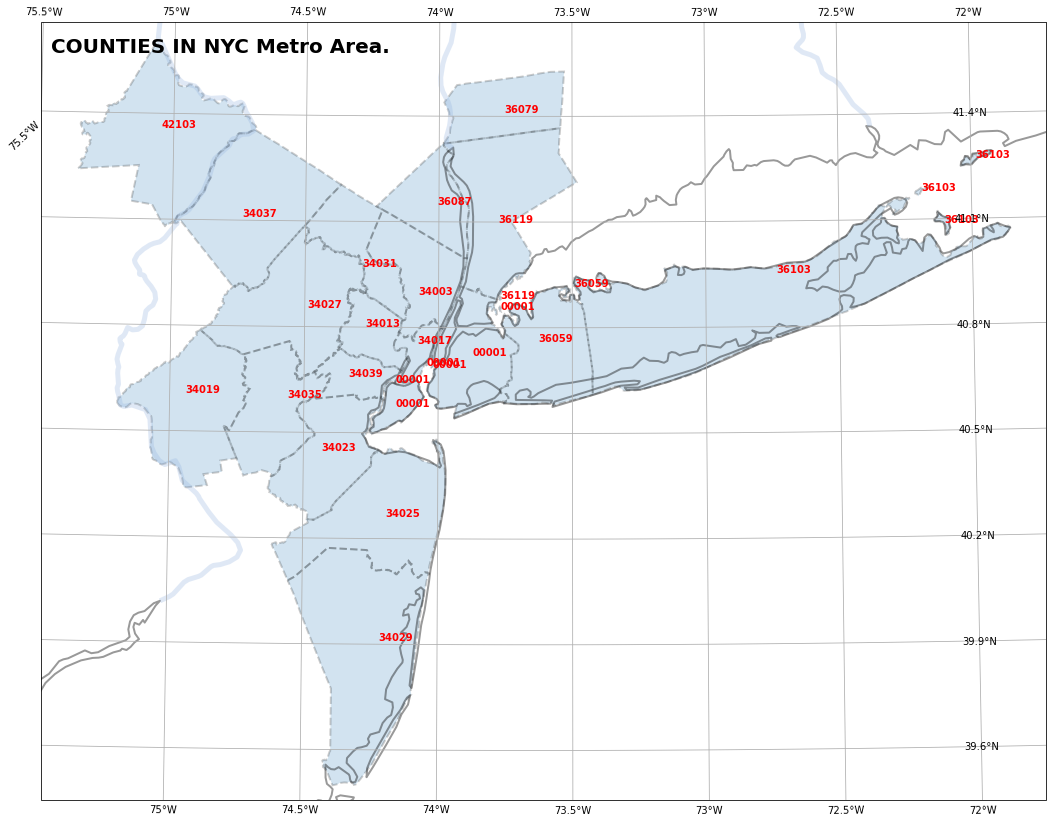

In [2]:
fig = pylab.figure()
fig.set_size_inches([18,12])
ax = viz.display_msa( 'nyc', fig, doShow=True )
for patch in ax.patches:
    patch._alpha = 0.2

Now collect the incident data for the CONUS, and store into the file. Subsequent operations will just *load* this serialized file into this notebook.

In [3]:
cdat = COVID19Database( )
inc_data_conus = core.get_incident_data( cdat.data_conus( ) )
pickle.dump( inc_data_conus, gzip.open( 'data_conus_LATEST.pkl.gz', 'wb') )

In subsequent operations, just **load** the `inc_data_conus` from the file.

In [3]:
inc_data_conus = pickle.load( gzip.open( 'data_conus_LATEST.pkl.gz', 'rb'))

This is the number of cases and deaths, *cumulatively*, in the [CONUS](https://en.wikipedia.org/wiki/Contiguous_United_States)

In [4]:
cumul_cases = numpy.array( inc_data_conus['df'].cases, dtype=int )
cumul_deaths = numpy.array( inc_data_conus['df'].death, dtype=int )

These are the days-in-order from the first incident day. For the 7-day average, start on *seventh* day after first incident day. For the 1-day average, start on the *first* day after first incident day.

In [5]:
num_days  = len( numpy.array(inc_data_conus['df'].cases ) )
days_7day = numpy.array( list(range( 7, num_days ) ), dtype=int )
days_1day = numpy.array( list(range( 1, num_days ) ), dtype=int )

Here are the 7 day and 1 day COVID-19 case and death rates for the `CONUS`

In [6]:
cases_rate_7day = ( cumul_cases[7:] - cumul_cases[:-7] ) / 7.0
cases_rate_1day = ( cumul_cases[1:] - cumul_cases[:-1] ) / 1.0
death_rate_7day = ( cumul_deaths[7:] - cumul_deaths[:-7] ) / 7.0
death_rate_1day = ( cumul_deaths[1:] - cumul_deaths[:-1] ) / 1.0

Plot of the 7 day and 1 day averaged new COVID-19 case rate for the `CONUS`.

Text(0.5, 1.0, 'AVERAGED COVID-19 NEW CASES RATES FOR CONUS')

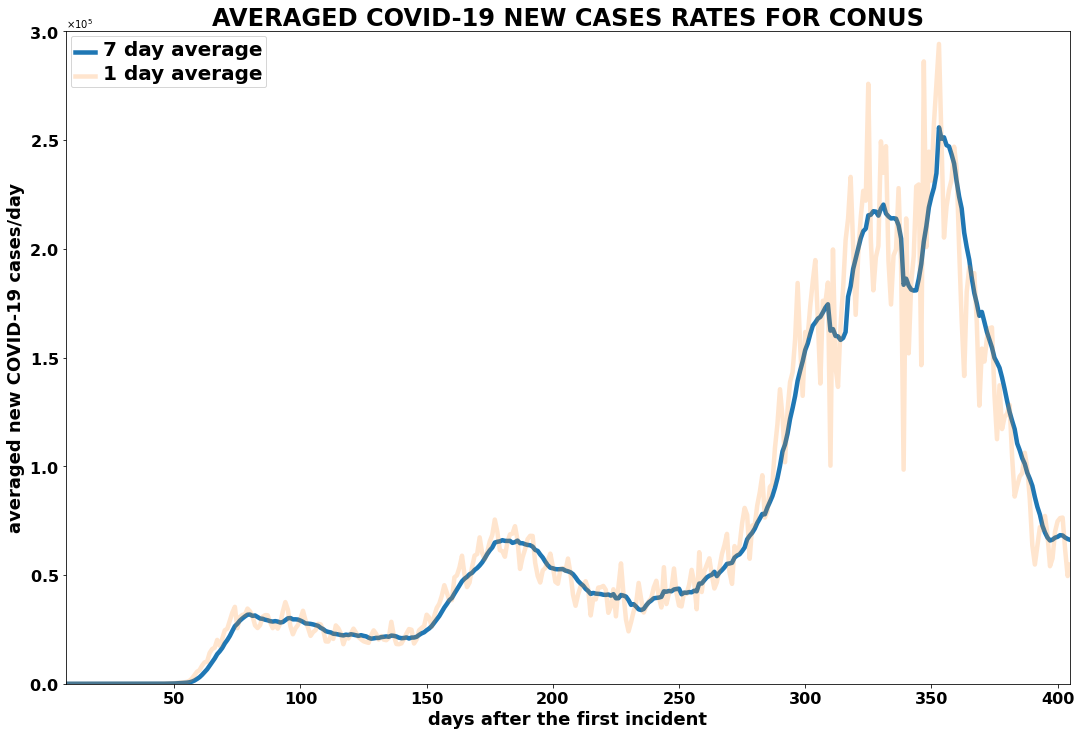

In [7]:
fig, ax = pylab.subplots( )
fig.set_size_inches([18,12])
#
ax.plot( days_7day, cases_rate_7day, linewidth = 4.5, label = '7 day average' )
ax.plot( days_1day, cases_rate_1day, alpha = 0.2, linewidth = 4.5, label = '1 day average' )
#
ax.set_xlim(7, len(numpy.array(inc_data_conus['df'].cases, dtype=float ) ) - 1 )
ax.set_ylim(0, 3e5)
ax.set_xlabel( 'days after the first incident', fontsize = 18, fontweight = 'bold' )
ax.set_ylabel( 'averaged new COVID-19 cases/day', fontsize = 18, fontweight = 'bold')
for tick in ax.xaxis.get_ticklabels() + ax.yaxis.get_ticklabels( ):
    tick.set_fontsize( 16 )
    tick.set_fontweight( 'bold')
ax.ticklabel_format(axis='y', scilimits=(0,0), useMathText = True)
leg = ax.legend( )
for txt in leg.texts:
    txt.set_fontsize( 20 )
    txt.set_fontweight( 'bold' )
ax.set_title( 'AVERAGED COVID-19 NEW CASES RATES FOR CONUS', fontsize = 24, fontweight = 'bold')

Text(0.5, 1.0, 'AVERAGED COVID-19 NEW DEATHS RATES FOR CONUS')

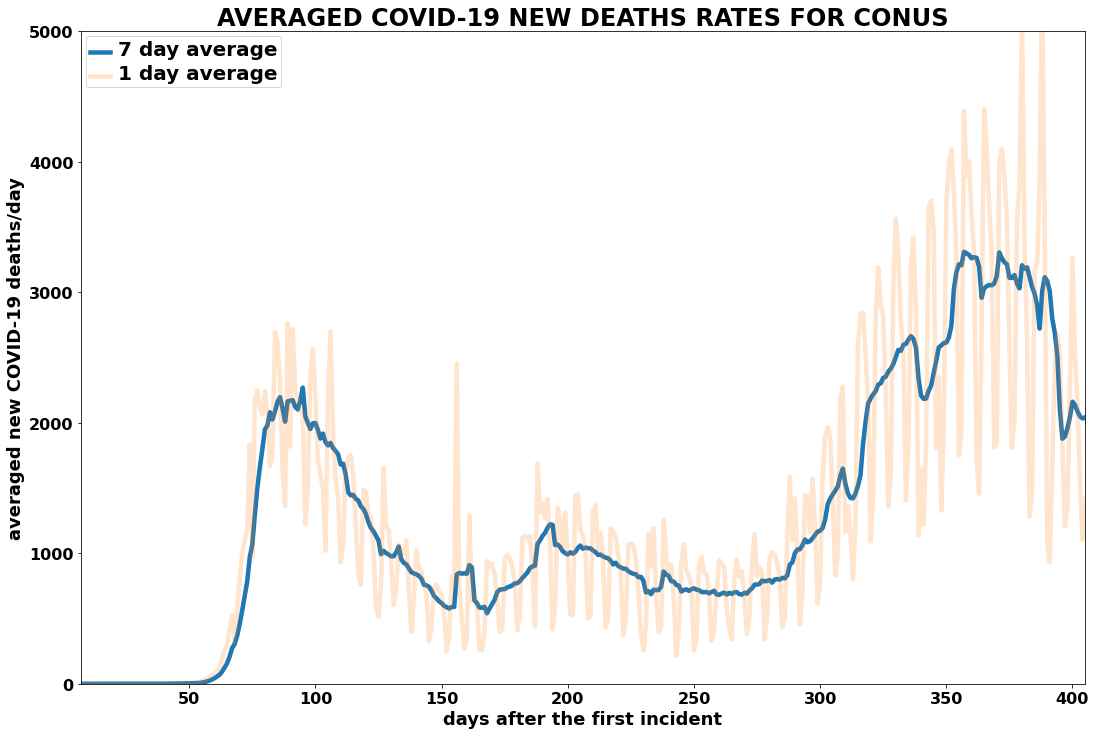

In [76]:
fig, ax = pylab.subplots( )
fig.set_size_inches([18,12])
ax.plot( days_7day, death_rate_7day, linewidth = 4.5, label = '7 day average' )
ax.plot( days_1day, death_rate_1day, alpha = 0.2, linewidth = 4.5, label = '1 day average' )
ax.set_xlim(7, len(numpy.array(inc_data_conus['df'].cases, dtype=float ) ) - 1 )
ax.set_ylim(0, 5000)
ax.set_xlabel( 'days after the first incident', fontsize = 18, fontweight = 'bold' )
ax.set_ylabel( 'averaged new COVID-19 deaths/day', fontsize = 18, fontweight = 'bold')
for tick in ax.xaxis.get_ticklabels() + ax.yaxis.get_ticklabels( ):
    tick.set_fontsize( 16 )
    tick.set_fontweight( 'bold')
#ax.ticklabel_format(axis='y', scilimits=(0,0), useMathText = True)
leg = ax.legend( )
for txt in leg.texts:
    txt.set_fontsize( 20 )
    txt.set_fontweight( 'bold' )
ax.set_title( 'AVERAGED COVID-19 NEW DEATHS RATES FOR CONUS', fontsize = 24, fontweight = 'bold')

In [10]:
inc_data_bayarea = core.get_incident_data( cdat.data_msas_2019( )[ 'bayarea' ] )

In [11]:
cumul_cases_bayarea = numpy.array( inc_data_bayarea['df'].cases, dtype=int )
cumul_deaths_bayarea = numpy.array( inc_data_bayarea['df'].death, dtype=int )
num_days_bayarea  = len( numpy.array(inc_data_bayarea['df'].cases ) )
days_7day_bayarea = numpy.array( list(range( 7, num_days_bayarea ) ), dtype=int )
days_1day_bayarea = numpy.array( list(range( 1, num_days_bayarea ) ), dtype=int )

In [12]:
cases_rate_7day_bayarea = ( cumul_cases_bayarea[7:] - cumul_cases_bayarea[:-7] ) / 7.0
cases_rate_1day_bayarea = ( cumul_cases_bayarea[1:] - cumul_cases_bayarea[:-1] ) / 1.0
death_rate_7day_bayarea = ( cumul_deaths_bayarea[7:] - cumul_deaths_bayarea[:-7] ) / 7.0
death_rate_1day_bayarea = ( cumul_deaths_bayarea[1:] - cumul_deaths_bayarea[:-1] ) / 1.0

(datetime.date(2021, 3, 15), datetime.date(2020, 1, 31), 405)

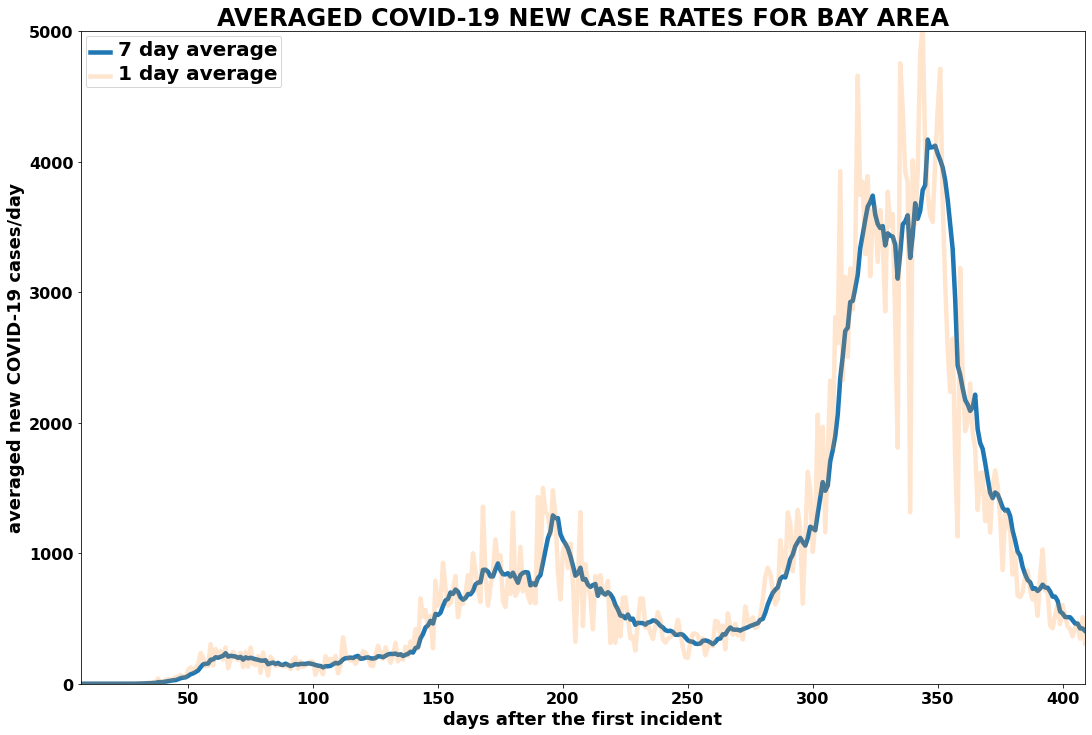

In [13]:
fig, ax = pylab.subplots( )
fig.set_size_inches([18,12])
#
ax.plot( days_7day_bayarea, cases_rate_7day_bayarea, linewidth = 4.5, label = '7 day average' )
ax.plot( days_1day_bayarea, cases_rate_1day_bayarea, alpha = 0.2, linewidth = 4.5, label = '1 day average' )
#
ax.set_xlim(7, len(numpy.array(inc_data_bayarea['df'].cases, dtype=float ) ) - 1 )
ax.set_ylim(0, 5000)
ax.set_xlabel( 'days after the first incident', fontsize = 18, fontweight = 'bold' )
ax.set_ylabel( 'averaged new COVID-19 cases/day', fontsize = 18, fontweight = 'bold')
for tick in ax.xaxis.get_ticklabels() + ax.yaxis.get_ticklabels( ):
    tick.set_fontsize( 16 )
    tick.set_fontweight( 'bold')
#ax.ticklabel_format(axis='y', scilimits=(0,0), useMathText = True)
leg = ax.legend( )
for txt in leg.texts:
    txt.set_fontsize( 20 )
    txt.set_fontweight( 'bold' )
ax.set_title( 'AVERAGED COVID-19 NEW CASE RATES FOR BAY AREA', fontsize = 24, fontweight = 'bold')
inc_data_bayarea['df'].date.max( ), inc_data_bayarea['df'].date.min( ), int( cases_rate_7day_bayarea[-1] )
# ax.text( 25.0, 4000, 'FIRST', fontdict = { 'fontsize' : 20, 'fontweight' : 'bold' } )

Text(0.5, 1.0, 'AVERAGED COVID-19 NEW DEATH RATES FOR BAY AREA')

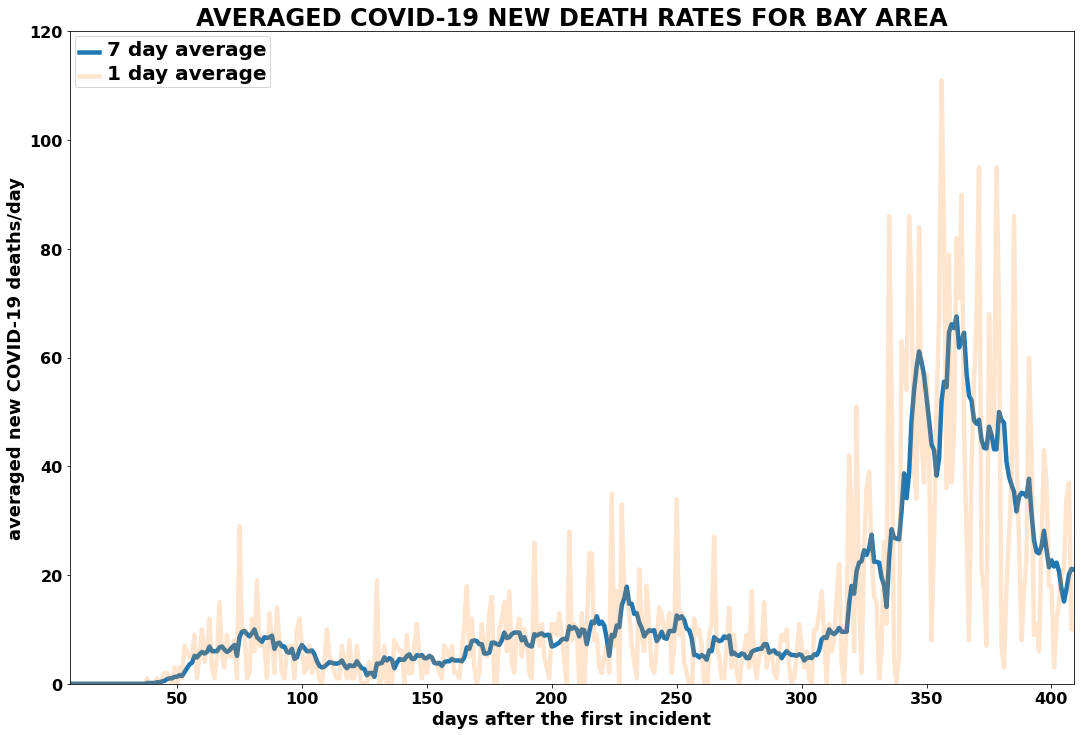

In [14]:
fig, ax = pylab.subplots( )
fig.set_size_inches([18,12])
ax.plot( days_7day_bayarea, death_rate_7day_bayarea, linewidth = 4.5, label = '7 day average' )
ax.plot( days_1day_bayarea, death_rate_1day_bayarea, alpha = 0.2, linewidth = 4.5, label = '1 day average' )
ax.set_xlim(7, len(numpy.array(inc_data_bayarea['df'].cases, dtype=float ) ) - 1 )
ax.set_ylim(0, 120 )
ax.set_xlabel( 'days after the first incident', fontsize = 18, fontweight = 'bold' )
ax.set_ylabel( 'averaged new COVID-19 deaths/day', fontsize = 18, fontweight = 'bold')
for tick in ax.xaxis.get_ticklabels() + ax.yaxis.get_ticklabels( ):
    tick.set_fontsize( 16 )
    tick.set_fontweight( 'bold')
#ax.ticklabel_format(axis='y', scilimits=(0,0), useMathText = True)
leg = ax.legend( )
for txt in leg.texts:
    txt.set_fontsize( 20 )
    txt.set_fontweight( 'bold' )
ax.set_title( 'AVERAGED COVID-19 NEW DEATH RATES FOR BAY AREA', fontsize = 24, fontweight = 'bold')

In [28]:
from dateutil.relativedelta import relativedelta

In [31]:
relativedelta(days=340) + inc_data_bayarea['df'].date.min( )

datetime.date(2021, 1, 5)